In [1]:
import random
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
from cartopy.feature import OCEAN
from adjustText import adjust_text
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
from matplotlib.offsetbox import AnchoredText


In [2]:
# Europe extent
extent = (-12.5, 35, 32, 72)

# Albers projection
ccrs_albers = ccrs.AlbersEqualArea()

# PlateCarree projection
ccrs_plate = ccrs.PlateCarree()

In [3]:
populated_places = r"..\Data\NEARTH\ne_10m_populated_places.shp"
adm0_countries = r"..\Data\NEARTH\ne_10m_admin_0_countries.shp"

In [4]:
ue_countries = ["Austria", 
                "Belgium", 
                "Bulgaria", 
                "Croatia", 
                "Cyprus", 
                "Czech Republic", 
                "Denmark", 
                "Estonia", 
                "Finland", 
                "France", 
                "Germany", 
                "Greece", 
                "Hungary", 
                "Ireland", 
                "Italy", 
                "Latvia", 
                "Lithuania", 
                "Luxembourg", 
                "Malta", 
                "Netherlands", 
                "Poland", 
                "Portugal", 
                "Romania", 
                "Slovakia", 
                "Slovenia", 
                "Spain", 
                "Sweden"]

In [5]:
cap_reader = shpreader.Reader(populated_places)
capitals_fcs = [record for record in cap_reader.records() 
            if record.attributes["FEATURECLA"] == "Admin-0 capital"
            and record.attributes["ADM0NAME"] in ue_countries
            and (extent[0] < record.geometry.x < extent[1]) 
            and (extent[2] < record.geometry.y < extent[3])]

In [6]:
adm0_reader = shpreader.Reader(adm0_countries)
adm0_fcs = [record for record in adm0_reader.records()]

In [7]:
# Colors
country_eu_fc = (234/255, 211/255, 189/255)
country_no_eu_fc = (252/255, 255/255, 217/255, 0.5)
ocean_fc = (220/255, 220/255, 220/255)

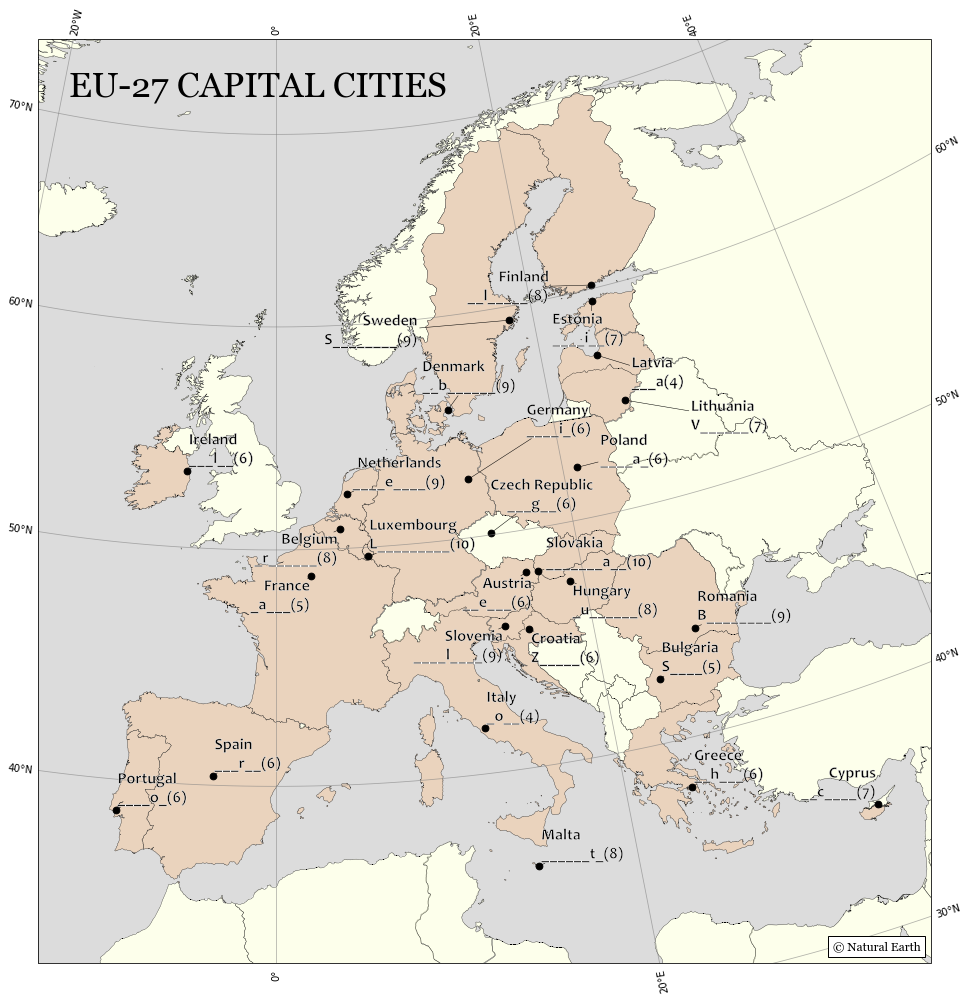

In [8]:
fig = plt.figure(figsize=(14, 14))
ax = plt.subplot(projection=ccrs_albers)

# Add Ocean
ax.add_feature(OCEAN, color=ocean_fc, zorder=0)

# Add EU-Non EU Borders
for po in adm0_fcs:
    if po.attributes["NAME"] in ue_countries:
        ax.add_geometries([po.geometry], 
                          crs=ccrs_plate,
                          lw=0.3,
                          facecolor=country_eu_fc,
                          edgecolor=(0, 0, 0), 
                          zorder=0)
    else:
        ax.add_geometries([po.geometry], 
                          crs=ccrs_plate,
                          lw=0.3,
                          facecolor=country_no_eu_fc,
                          edgecolor=(0, 0, 0), 
                          zorder=0)
# Plot capitals
ax.scatter([point.geometry.x for point in capitals_fcs],
           [point.geometry.y for point in capitals_fcs],
           color="k",
           s=45,
           transform=ccrs.PlateCarree())

# Add Labels
labels = []
for i, point in enumerate(capitals_fcs):
    cap_name = point.attributes["NAME"]
    rand_idx = random.randint(0, len(cap_name)-1)
    new_label = "%s\n" % point.attributes["ADM0NAME"]
    for li in range(0, len(cap_name)):
        if li == rand_idx:
            new_label += cap_name[li]
        else:
            new_label += "_"
    new_label += "(%s)" % len(cap_name)
    
    proj_pt = ccrs_albers.transform_point(point.geometry.x, point.geometry.y, src_crs=ccrs_plate)
    
    labels.append(ax.text(proj_pt[0], 
                         proj_pt[1],
                         new_label,
                         fontname="Candara",
                         fontsize=16,
                         weight="bold",
                         color="black",
                         zorder=2, 
                         path_effects=[pe.Stroke(linewidth=0.5, foreground="white")]))

adjust_text(labels, arrowprops=dict(arrowstyle="-", lw=0.5))

# Add Title
title_text = AnchoredText(r'EU-27 CAPITAL CITIES', 
                          loc=2, prop={'size': 35, 
                                       "fontname": "Georgia"}, 
                          frameon=False)
ax.add_artist(title_text)

# Add Credits
nearth_text = AnchoredText(r'© Natural Earth', 
                           loc=4, 
                           prop={'size': 12, "fontname": "Georgia"}, 
                           frameon=True)
ax.add_artist(nearth_text)

# Add Gridlines
ax.gridlines(color='grey',
            alpha=0.6,
            draw_labels=True)

# Set extent
ax.set_extent (extent, ccrs_plate)
plt.tight_layout()
plt.savefig("13_NaturalEarth.jpg", dpi=300, transparent=False)